In [1]:
import sys
paths = [
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/config",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/ds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_intrinio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/web",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_portfolio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium/api",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/estypes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esmappings",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esindexes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/utils",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_quandl",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_snp",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/public",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_barchart",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_redis",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/models",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_twitter",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_edgar",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_fred",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_oecd",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_websocket",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/symbol_mapping",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cryptocurrency",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/user",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cbonds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/screener_sbanalysis_api/"
]

In [2]:
sys.path += paths


In [3]:
# !pip install elasticsearch-dsl

In [9]:
year = 2015
for i in range(year - 4, year +1):
    print (i)

2011
2012
2013
2014
2015


In [4]:
# !pip install psycopg2-binary

In [10]:

from pandas.io import sql as psql

In [11]:
from lib.static_db import PgsqlExecutor

In [12]:
snpsource = {
        "host": "snp-instance-1-us-east-1b.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "snpx_read",
        "credentials": "Nsp563Xz",
        "database": "xpressfeed"
      }

research_db = {
        "host": "dev-df-postgresql.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "postgres",
        "credentials": "DqR567Q1",
        "database": "modelresearch"
      }

In [13]:
db = PgsqlExecutor(research_db)

In [14]:
sql = """

select * from dcf_values order by symbol, fiscal_year, created desc
"""
data = db.get_dataframe(sql)
data.head()

id symbol  is_active  current_price  market_growth_rate  \
0  34072      A          1          45.56               0.095   
1  10797      A          1          66.97               0.095   
2  29176      A          1          67.46               0.095   
3   4012      A          1          90.38               0.095   
4  34075     AA          0          28.08               0.095   

   current_growth_rate  fiscal_year  total_years  market_dcf    dcf  \
0               -1.868       2016.0          5.0        56.0    0.0   
1               -1.841       2017.0          5.0        75.4    0.0   
2               -1.278       2018.0          5.0        80.2    0.0   
3               -0.064       2019.0          5.0       112.3  114.4   
4               -0.481       2016.0          4.0         NaN    NaN   

                                               error  \
0                                                      
1                                                      
2                                                      
3                                                      
4  run failed: AA single positional indexer is ou...   

                     created  
0 2020-06-09 14:40:17.261555  
1 2020-06-08 23:03:03.834008  
2 2020-06-09 13:03:08.300175  
3 2020-06-08 20:02:16.869561  
4 2020-06-09 14:40:19.420263

In [15]:
def shifted_by(pd_series, row_shift):
    """
    get close price the day before shifted_by(data['close'], 1)
    :return: shifted_vals
    """
    shifted_vals = pd_series.iloc[:-row_shift]
    shifted_vals.index = pd_series.index[row_shift:]
    return shifted_vals

In [16]:
data.loc[:, 'last_symbol'] = shifted_by(data['symbol'], 1)
data.loc[:, 'last_price'] = shifted_by(data['current_price'], 1)
data.loc[:, 'last_growth_rate'] = shifted_by(data['current_growth_rate'], 1)
data.loc[:, 'last_fiscal_year'] = shifted_by(data['fiscal_year'], 1)
data.loc[:, 'last_market_dcf'] = shifted_by(data['market_dcf'], 1)
data.loc[:, 'last_dcf'] = shifted_by(data['dcf'], 1)


In [17]:
data.head()

id symbol  is_active  current_price  market_growth_rate  \
0  34072      A          1          45.56               0.095   
1  10797      A          1          66.97               0.095   
2  29176      A          1          67.46               0.095   
3   4012      A          1          90.38               0.095   
4  34075     AA          0          28.08               0.095   

   current_growth_rate  fiscal_year  total_years  market_dcf    dcf  \
0               -1.868       2016.0          5.0        56.0    0.0   
1               -1.841       2017.0          5.0        75.4    0.0   
2               -1.278       2018.0          5.0        80.2    0.0   
3               -0.064       2019.0          5.0       112.3  114.4   
4               -0.481       2016.0          4.0         NaN    NaN   

                                               error  \
0                                                      
1                                                      
2                                                      
3                                                      
4  run failed: AA single positional indexer is ou...   

                     created last_symbol  last_price  last_growth_rate  \
0 2020-06-09 14:40:17.261555         NaN         NaN               NaN   
1 2020-06-08 23:03:03.834008           A       45.56            -1.868   
2 2020-06-09 13:03:08.300175           A       66.97            -1.841   
3 2020-06-08 20:02:16.869561           A       67.46            -1.278   
4 2020-06-09 14:40:19.420263           A       90.38            -0.064   

   last_fiscal_year  last_market_dcf  last_dcf  
0               NaN              NaN       NaN  
1            2016.0             56.0       0.0  
2            2017.0             75.4       0.0  
3            2018.0             80.2       0.0  
4            2019.0            112.3     114.4

In [18]:
def convert_direction(value):
    if value > 0:
        return 1
    return -1
data["price_change"] = data["current_price"] - data["last_price"]
data["direction"] = data["price_change"].apply(convert_direction)
data["correct"] = data["symbol"] == data["last_symbol"]
data["fiscal_change"] = data["fiscal_year"] - data["last_fiscal_year"]
data["growth_changes"] = data["current_growth_rate"] - data["last_growth_rate"]
data["market_dcf_change"] = (data["market_dcf"] - data["last_market_dcf"]) * 100 / data["last_price"]
data["dcf_change"] = (data["dcf"] - data["last_dcf"]) * 100 / data["last_price"]
data["dcf_to_price"] = (data["last_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["market_dcf_to_price"] = (data["last_market_dcf"] - data["last_price"]) * 100 / data["last_price"]





In [19]:
data.head()

id symbol  is_active  current_price  market_growth_rate  \
0  34072      A          1          45.56               0.095   
1  10797      A          1          66.97               0.095   
2  29176      A          1          67.46               0.095   
3   4012      A          1          90.38               0.095   
4  34075     AA          0          28.08               0.095   

   current_growth_rate  fiscal_year  total_years  market_dcf    dcf  ...  \
0               -1.868       2016.0          5.0        56.0    0.0  ...   
1               -1.841       2017.0          5.0        75.4    0.0  ...   
2               -1.278       2018.0          5.0        80.2    0.0  ...   
3               -0.064       2019.0          5.0       112.3  114.4  ...   
4               -0.481       2016.0          4.0         NaN    NaN  ...   

  last_dcf price_change direction  correct  fiscal_change  growth_changes  \
0      NaN          NaN        -1    False            NaN             NaN   
1      0.0        21.41         1     True            1.0           0.027   
2      0.0         0.49         1     True            1.0           0.563   
3      0.0        22.92         1     True            1.0           1.214   
4    114.4       -62.30        -1    False           -3.0          -0.417   

   market_dcf_change  dcf_change  dcf_to_price  market_dcf_to_price  
0                NaN         NaN           NaN                  NaN  
1          42.581212    0.000000   -100.000000            22.914838  
2           7.167388    0.000000   -100.000000            12.587726  
3          47.583753  169.581975   -100.000000            18.885265  
4                NaN         NaN     26.576676            24.253153  

[5 rows x 27 columns]

In [22]:
new_data = data[(data["correct"])&(data["fiscal_change"] == 1) &(data["is_active"] == 1)&(data["total_years"] == 5)]

In [23]:
print (new_data.shape)
new_data.head()

(7342, 27)


id symbol  is_active  current_price  market_growth_rate  \
1   10797      A          1          66.97               0.095   
2   29176      A          1          67.46               0.095   
3    4012      A          1          90.38               0.095   
8    4013     AA          1          12.07               0.095   
27  10812    AAL          1          52.03               0.095   

    current_growth_rate  fiscal_year  total_years  market_dcf    dcf  ...  \
1                -1.841       2017.0          5.0        75.4    0.0  ...   
2                -1.278       2018.0          5.0        80.2    0.0  ...   
3                -0.064       2019.0          5.0       112.3  114.4  ...   
8                 0.001       2019.0          5.0        63.0   54.4  ...   
27                2.228       2017.0          5.0        97.7  193.2  ...   

   last_dcf price_change direction  correct  fiscal_change  growth_changes  \
1       0.0        21.41         1     True            1.0           0.027   
2       0.0         0.49         1     True            1.0           0.563   
3       0.0        22.92         1     True            1.0           1.214   
8       NaN       -14.51        -1     True            1.0          -0.012   
27    168.6         5.34         1     True            1.0           0.817   

    market_dcf_change  dcf_change  dcf_to_price  market_dcf_to_price  
1           42.581212    0.000000   -100.000000            22.914838  
2            7.167388    0.000000   -100.000000            12.587726  
3           47.583753  169.581975   -100.000000            18.885265  
8                 NaN         NaN           NaN                  NaN  
27          29.985007   52.687942    261.105162            79.267509  

[5 rows x 27 columns]

In [24]:
new_data =new_data.loc[:, ["symbol", "current_price","last_price", "last_growth_rate","current_growth_rate", "market_dcf", "dcf", "growth_changes",
                          "market_dcf_change", "dcf_change", "last_fiscal_year", "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price","price_change", 
                           "direction"]].iloc[1:, :]

In [25]:
new_data["price_change_perf"] = (new_data["current_price"] - new_data["last_price"]) * 100 / new_data["last_price"]


In [26]:
new_data.head()

symbol  current_price  last_price  last_growth_rate  current_growth_rate  \
2       A          67.46       66.97            -1.841               -1.278   
3       A          90.38       67.46            -1.278               -0.064   
8      AA          12.07       26.58             0.013                0.001   
27    AAL          52.03       46.69             1.411                2.228   
28    AAL          32.11       52.03             2.228             -130.839   

    market_dcf    dcf  growth_changes  market_dcf_change  dcf_change  \
2         80.2    0.0           0.563           7.167388    0.000000   
3        112.3  114.4           1.214          47.583753  169.581975   
8         63.0   54.4          -0.012                NaN         NaN   
27        97.7  193.2           0.817          29.985007   52.687942   
28        82.3    0.0        -133.067         -29.598309 -371.324236   

    last_fiscal_year  last_market_dcf  last_dcf  dcf_to_price  \
2             2017.0             75.4       0.0   -100.000000   
3             2018.0             80.2       0.0   -100.000000   
8             2018.0              NaN       NaN           NaN   
27            2016.0             83.7     168.6    261.105162   
28            2017.0             97.7     193.2    271.324236   

    market_dcf_to_price  price_change  direction  price_change_perf  
2             12.587726          0.49          1           0.731671  
3             18.885265         22.92          1          33.975689  
8                   NaN        -14.51         -1         -54.589917  
27            79.267509          5.34          1          11.437139  
28            87.776283        -19.92         -1         -38.285604

In [27]:
# new_data = new_data[(new_data["price_change_perf"] < 100) & (new_data["price_change_perf"] > -100) ]

In [28]:
new_data[new_data["direction"] ==1]["dcf_to_price"].describe()

count    3.259000e+03
mean     9.675965e+14
std      5.522375e+16
min     -2.882567e+12
25%     -1.000000e+02
50%      1.746168e+01
75%      1.333874e+02
max      3.152595e+18
Name: dcf_to_price, dtype: float64

In [29]:
dcf_to_price = new_data[(new_data["direction"] == 1) 
                        & (new_data["dcf_to_price"] > -110)
                        & (new_data["dcf_to_price"] < 200)]
dcf_to_price = dcf_to_price.loc[:, 'dcf_to_price'].values

In [30]:
import matplotlib.pyplot as plt

plt.hist(dcf_to_price, bins=40)

(array([ 38., 883.,  23.,  13.,  16.,   6.,   8.,   8.,  11.,   7.,   7.,
          4.,   7.,  10.,  43.,  78.,  75.,  80.,  92., 100.,  66.,  55.,
         60.,  56.,  51.,  50.,  30.,  39.,  29.,  23.,  22.,   9.,  19.,
         19.,   9.,  11.,   9.,  13.,  12.,  10.]),
 array([-108.9869281 , -101.26848085,  -93.55003359,  -85.83158633,
         -78.11313907,  -70.39469182,  -62.67624456,  -54.9577973 ,
         -47.23935005,  -39.52090279,  -31.80245553,  -24.08400827,
         -16.36556102,   -8.64711376,   -0.9286665 ,    6.78978076,
          14.50822801,   22.22667527,   29.94512253,   37.66356979,
          45.38201704,   53.1004643 ,   60.81891156,   68.53735882,
          76.25580607,   83.97425333,   91.69270059,   99.41114785,
         107.1295951 ,  114.84804236,  122.56648962,  130.28493687,
         138.00338413,  145.72183139,  153.44027865,  161.1587259 ,
         168.87717316,  176.59562042,  184.31406768,  192.03251493,
         199.75096219]),
 <a list of 40 Patch 

In [31]:
new_data[new_data["direction"] == 1]["market_dcf_to_price"].describe()

count    3.259000e+03
mean    -3.421352e+05
std      3.214839e+07
min     -1.730733e+09
25%      2.049549e+00
50%      3.678933e+01
75%      9.464323e+01
max      6.099999e+08
Name: market_dcf_to_price, dtype: float64

(array([  2.,   4.,   3.,   0.,  10.,   8.,   6.,   3.,   4.,  23.,   6.,
          5.,   2.,   4.,   3.,  12.,   9.,  28.,  38., 136., 209., 251.,
        230., 239., 190., 168., 118., 113.,  89.,  89.,  60.,  35.,  27.,
         32.,  25.,  19.,  23.,  17.,  12.,  18.]),
 array([-199.34666667, -189.36639213, -179.38611759, -169.40584306,
        -159.42556852, -149.44529398, -139.46501945, -129.48474491,
        -119.50447038, -109.52419584,  -99.5439213 ,  -89.56364677,
         -79.58337223,  -69.60309769,  -59.62282316,  -49.64254862,
         -39.66227408,  -29.68199955,  -19.70172501,   -9.72145047,
           0.25882406,   10.2390986 ,   20.21937313,   30.19964767,
          40.17992221,   50.16019674,   60.14047128,   70.12074582,
          80.10102035,   90.08129489,  100.06156943,  110.04184396,
         120.0221185 ,  130.00239303,  139.98266757,  149.96294211,
         159.94321664,  169.92349118,  179.90376572,  189.88404025,
         199.86431479]),
 <a list of 40 Patch 

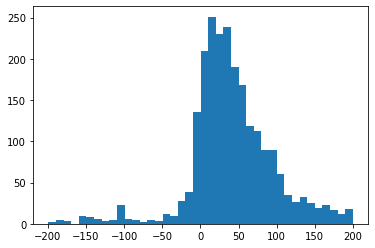

In [32]:
market_dcf_to_price = new_data[(new_data["direction"] == 1) 
                        & (new_data["market_dcf_to_price"] > -200)
                        & (new_data["market_dcf_to_price"] < 200)]
market_dcf_to_price = market_dcf_to_price.loc[:, 'market_dcf_to_price'].values

plt.hist(market_dcf_to_price, bins=40)

In [33]:
new_data[new_data["direction"] == 1]["last_growth_rate"].describe()

count    3383.000000
mean       -4.400631
std       182.352960
min     -9723.113000
25%        -0.856000
50%         0.088000
75%         0.497500
max       657.818000
Name: last_growth_rate, dtype: float64

In [34]:
last_growth_rate = new_data[(new_data["direction"] == 1) 
                        & (new_data["last_growth_rate"] > -0.88)
                        & (new_data["last_growth_rate"] < 0.65)]
last_growth_rate = last_growth_rate.loc[:, 'last_growth_rate'].values

In [35]:
plt.hist(last_growth_rate, bins=40)

(array([ 18.,  13.,  10.,  10.,  13.,  18.,  17.,  13.,  16.,  17.,  17.,
         20.,  23.,  21.,  20.,  19.,  25.,  26.,  33.,  46.,  33.,  59.,
         79., 121., 124., 147., 107., 111.,  96.,  86.,  79.,  65.,  56.,
         49.,  45.,  45.,  47.,  42.,  23.,  33.]),
 array([-8.77000e-01, -8.38875e-01, -8.00750e-01, -7.62625e-01,
        -7.24500e-01, -6.86375e-01, -6.48250e-01, -6.10125e-01,
        -5.72000e-01, -5.33875e-01, -4.95750e-01, -4.57625e-01,
        -4.19500e-01, -3.81375e-01, -3.43250e-01, -3.05125e-01,
        -2.67000e-01, -2.28875e-01, -1.90750e-01, -1.52625e-01,
        -1.14500e-01, -7.63750e-02, -3.82500e-02, -1.25000e-04,
         3.80000e-02,  7.61250e-02,  1.14250e-01,  1.52375e-01,
         1.90500e-01,  2.28625e-01,  2.66750e-01,  3.04875e-01,
         3.43000e-01,  3.81125e-01,  4.19250e-01,  4.57375e-01,
         4.95500e-01,  5.33625e-01,  5.71750e-01,  6.09875e-01,
         6.48000e-01]),
 <a list of 40 Patch objects>)

In [36]:
new_data[new_data["direction"] == -1]["dcf_to_price"].describe()

count    3.687000e+03
mean    -2.084926e+14
std      1.140321e+16
min     -6.875203e+17
25%     -1.000000e+02
50%     -9.739216e+01
75%      1.493043e+02
max      1.109842e+15
Name: dcf_to_price, dtype: float64

In [37]:
dcf_to_price = new_data[(new_data["direction"] == -1) 
                        & (new_data["dcf_to_price"] > -200)
                        & (new_data["dcf_to_price"] < 200)]
dcf_to_price = dcf_to_price.loc[:, 'dcf_to_price'].values

plt.hist(dcf_to_price, bins=40)

(array([   5.,    7.,    4.,    6.,    8.,    7.,   15.,   14.,   25.,
        1147.,   79.,   22.,   21.,   15.,   15.,   16.,   12.,    9.,
          12.,   25.,   32.,   63.,   77.,   74.,   66.,   55.,   56.,
          57.,   63.,   28.,   43.,   34.,   31.,   27.,   20.,   16.,
          23.,   10.,   13.,   10.]),
 array([-1.98409175e+02, -1.88481223e+02, -1.78553270e+02, -1.68625318e+02,
        -1.58697365e+02, -1.48769413e+02, -1.38841461e+02, -1.28913508e+02,
        -1.18985556e+02, -1.09057604e+02, -9.91296512e+01, -8.92016988e+01,
        -7.92737464e+01, -6.93457941e+01, -5.94178417e+01, -4.94898893e+01,
        -3.95619369e+01, -2.96339845e+01, -1.97060322e+01, -9.77807978e+00,
         1.49872599e-01,  1.00778250e+01,  2.00057774e+01,  2.99337297e+01,
         3.98616821e+01,  4.97896345e+01,  5.97175869e+01,  6.96455393e+01,
         7.95734916e+01,  8.95014440e+01,  9.94293964e+01,  1.09357349e+02,
         1.19285301e+02,  1.29213254e+02,  1.39141206e+02,  1.49069158

In [38]:
new_data[new_data["direction"] == -1]["market_dcf_to_price"].describe()

count    3.687000e+03
mean     1.097654e+04
std      8.088511e+05
min     -1.193522e+07
25%     -1.530998e+01
50%      4.107019e+01
75%      1.444983e+02
max      4.736031e+07
Name: market_dcf_to_price, dtype: float64

(array([  8.,   8.,   5.,   4.,   0.,   6.,   3.,  16.,   6.,  37.,   1.,
          5.,   6.,   1.,   5.,  11.,  17.,  23.,  44., 128., 177., 209.,
        161., 202., 167., 133., 127.,  95., 107., 106.,  68.,  50.,  41.,
         28.,  51.,  30.,  39.,  31.,  25.,  20.]),
 array([-199.33773957, -189.35429608, -179.37085259, -169.3874091 ,
        -159.40396562, -149.42052213, -139.43707864, -129.45363515,
        -119.47019166, -109.48674817,  -99.50330468,  -89.51986119,
         -79.5364177 ,  -69.55297421,  -59.56953072,  -49.58608723,
         -39.60264374,  -29.61920025,  -19.63575677,   -9.65231328,
           0.33113021,   10.3145737 ,   20.29801719,   30.28146068,
          40.26490417,   50.24834766,   60.23179115,   70.21523464,
          80.19867813,   90.18212162,  100.16556511,  110.1490086 ,
         120.13245209,  130.11589557,  140.09933906,  150.08278255,
         160.06622604,  170.04966953,  180.03311302,  190.01655651,
         200.        ]),
 <a list of 40 Patch 

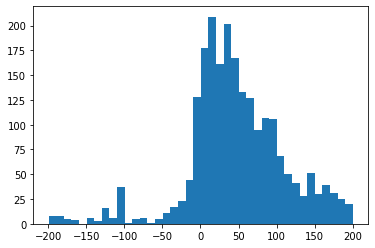

In [39]:
market_dcf_to_price = new_data[(new_data["direction"] == -1) 
                        & (new_data["market_dcf_to_price"] > -200)
                        & (new_data["market_dcf_to_price"] < 200)]
market_dcf_to_price = market_dcf_to_price.loc[:, 'market_dcf_to_price'].values

plt.hist(market_dcf_to_price, bins=40)

In [40]:
new_data[new_data["direction"] == -1]["last_growth_rate"].describe()

count    3857.000000
mean       -1.264563
std        67.062493
min     -3954.829000
25%        -1.109000
50%         0.037000
75%         0.514000
max       657.503000
Name: last_growth_rate, dtype: float64

(array([  8.,   8.,   5.,   4.,   0.,   6.,   3.,  16.,   6.,  37.,   1.,
          5.,   6.,   1.,   5.,  11.,  17.,  23.,  44., 128., 177., 209.,
        161., 202., 167., 133., 127.,  95., 107., 106.,  68.,  50.,  41.,
         28.,  51.,  30.,  39.,  31.,  25.,  20.]),
 array([-199.33773957, -189.35429608, -179.37085259, -169.3874091 ,
        -159.40396562, -149.42052213, -139.43707864, -129.45363515,
        -119.47019166, -109.48674817,  -99.50330468,  -89.51986119,
         -79.5364177 ,  -69.55297421,  -59.56953072,  -49.58608723,
         -39.60264374,  -29.61920025,  -19.63575677,   -9.65231328,
           0.33113021,   10.3145737 ,   20.29801719,   30.28146068,
          40.26490417,   50.24834766,   60.23179115,   70.21523464,
          80.19867813,   90.18212162,  100.16556511,  110.1490086 ,
         120.13245209,  130.11589557,  140.09933906,  150.08278255,
         160.06622604,  170.04966953,  180.03311302,  190.01655651,
         200.        ]),
 <a list of 40 Patch 

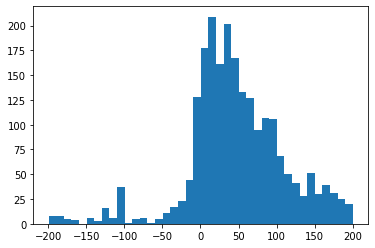

In [41]:
last_growth_rate = new_data[(new_data["direction"] == -1) 
                        & (new_data["last_growth_rate"] > -1)
                        & (new_data["last_growth_rate"] < 1)]
last_growth_rate = last_growth_rate.loc[:, 'last_growth_rate'].values

plt.hist(market_dcf_to_price, bins=40)

In [42]:
import numpy as np
import pandas as pd

In [43]:
# csv_file = "./make_dcf_model_0605.csv"
# data = pd.read_csv(csv_file, header=0, index_col=0)

In [44]:
data["price_change_perf"] = (data["current_price"] - data["last_price"]) * 100 / data["last_price"]

In [45]:


features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

X = data[features].values
Y = (data.loc[:, 'price_change_perf'].values) 

In [46]:
from numpy import loadtxt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
# !pip3 install sklearn

In [48]:

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [49]:
# !pip3 install matplotlib

ValueError: supplied range of [-100.0, inf] is not finite

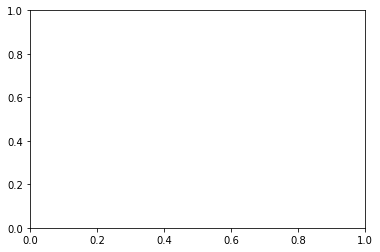

In [50]:
import matplotlib.pyplot as plt
plt.hist(y_test, bins=20)

In [51]:
filtered_outliner = data[(data["price_change_perf"] < 100) & (data["price_change_perf"] > -100) ]

In [52]:
features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

X = filtered_outliner[features].values
Y = (filtered_outliner.loc[:, 'price_change_perf'].values) 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [53]:
plt.hist(y_test, bins=40)

(array([ 749.,  303.,  155.,  145.,  141.,  148.,  154.,  121.,  152.,
         225.,  142.,  169.,  197.,  207.,  225.,  281.,  261.,  281.,
         266., 1793.,  269.,  224.,  234.,  227.,  184.,  147.,  158.,
         120.,   88.,  112.,   58.,   68.,   52.,   44.,   40.,   51.,
          27.,   28.,   26.,   30.]),
 array([-9.99999998e+01, -9.49999998e+01, -8.99999998e+01, -8.49999998e+01,
        -7.99999998e+01, -7.49999999e+01, -6.99999999e+01, -6.49999999e+01,
        -5.99999999e+01, -5.49999999e+01, -4.99999999e+01, -4.49999999e+01,
        -3.99999999e+01, -3.49999999e+01, -2.99999999e+01, -2.49999999e+01,
        -1.99999999e+01, -1.49999999e+01, -9.99999991e+00, -4.99999991e+00,
         8.40908996e-08,  5.00000008e+00,  1.00000001e+01,  1.50000001e+01,
         2.00000001e+01,  2.50000001e+01,  3.00000001e+01,  3.50000001e+01,
         4.00000001e+01,  4.50000000e+01,  5.00000000e+01,  5.50000000e+01,
         6.00000000e+01,  6.50000000e+01,  7.00000000e+01,  7.50000000

(array([2301.,  887.,  467.,  457.,  420.,  446.,  439.,  422.,  440.,
         637.,  439.,  553.,  538.,  619.,  682.,  798.,  847.,  842.,
         860., 5407.,  803.,  719.,  708.,  632.,  559.,  423.,  445.,
         337.,  270.,  324.,  188.,  210.,  168.,  215.,  142.,  137.,
         104.,   90.,   97.,   84.]),
 array([-1.00000000e+02, -9.50000000e+01, -9.00000000e+01, -8.50000000e+01,
        -8.00000000e+01, -7.50000000e+01, -7.00000000e+01, -6.50000000e+01,
        -6.00000000e+01, -5.50000000e+01, -5.00000000e+01, -4.50000000e+01,
        -4.00000000e+01, -3.50000000e+01, -3.00000000e+01, -2.50000000e+01,
        -2.00000000e+01, -1.50000000e+01, -9.99999999e+00, -4.99999999e+00,
         1.26614168e-08,  5.00000001e+00,  1.00000000e+01,  1.50000000e+01,
         2.00000000e+01,  2.50000000e+01,  3.00000000e+01,  3.50000000e+01,
         4.00000000e+01,  4.50000000e+01,  5.00000000e+01,  5.50000000e+01,
         6.00000000e+01,  6.50000000e+01,  7.00000000e+01,  7.50000000

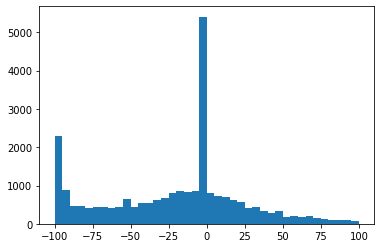

In [54]:
plt.hist(Y, bins=40)

In [55]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_pred = model.predict(X_test)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 5.000e+00, 7.000e+00, 8.000e+00, 9.000e+00,
        2.500e+01, 3.800e+01, 3.900e+01, 6.500e+01, 9.300e+01, 1.080e+02,
        1.270e+02, 1.990e+02, 2.380e+02, 3.170e+02, 4.995e+03, 5.530e+02,
        4.500e+02, 3.060e+02, 2.180e+02, 1.780e+02, 1.210e+02, 7.600e+01,
        4.800e+01, 3.600e+01, 1.500e+01, 6.000e+00, 4.000e+00, 2.000e+00,
        4.000e+00, 5.000e+00, 1.000e+00, 1.000e+00]),
 array([-128.60655  , -123.86761  , -119.12867  , -114.389725 ,
        -109.65078  , -104.91184  , -100.1729   ,  -95.43395  ,
         -90.69501  ,  -85.95607  ,  -81.217125 ,  -76.47818  ,
         -71.73924  ,  -67.0003   ,  -62.261356 ,  -57.52241  ,
         -52.78347  ,  -48.04453  ,  -43.305584 ,  -38.566643 ,
         -33.827698 ,  -29.088757 ,  -24.349815 ,  -19.610872 ,
         -14.871929 ,  -10.132986 ,   -5.394044 ,   -0.6551013,
           4.0838413,    8.822784 ,   13.561727 ,   18

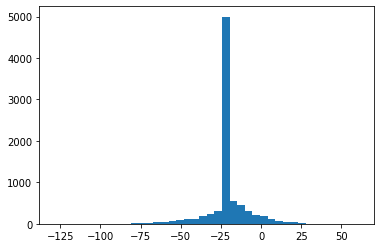

In [57]:
plt.hist(y_pred, bins=40)

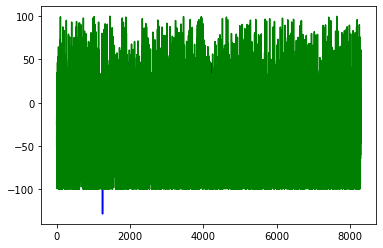

In [58]:
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.show()

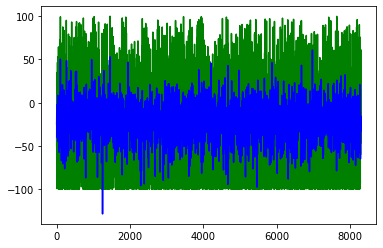

In [59]:
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')

plt.show()

In [72]:
accuracy = accuracy_score(y_test >= 30, y_pred >= 30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.00%


In [73]:
accuracy = accuracy_score(y_test >= 20, y_pred >= 20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.71%


In [75]:
accuracy = accuracy_score(y_test < -20, y_pred < -20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.56%


In [78]:
accuracy = accuracy_score(y_test < -40, y_pred < -40)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.12%


In [114]:
data[data["price_change_perf"] > 30]["last_growth_rate"].describe()

count    1728.000000
mean        0.163597
std        25.849220
min      -579.996000
25%        -0.921250
50%         0.086000
75%         0.565250
max       598.007000
Name: last_growth_rate, dtype: float64

(array([13.,  4.,  8., 11., 16., 11., 10., 12., 12.,  5., 16., 15., 11.,
        14., 18., 19., 32., 31., 36., 43., 61., 70., 65., 50., 59., 50.,
        41., 38., 35., 37., 28., 26., 26., 18., 27., 22., 14., 13.,  7.,
        13.]),
 array([-9.96000e-01, -9.46175e-01, -8.96350e-01, -8.46525e-01,
        -7.96700e-01, -7.46875e-01, -6.97050e-01, -6.47225e-01,
        -5.97400e-01, -5.47575e-01, -4.97750e-01, -4.47925e-01,
        -3.98100e-01, -3.48275e-01, -2.98450e-01, -2.48625e-01,
        -1.98800e-01, -1.48975e-01, -9.91500e-02, -4.93250e-02,
         5.00000e-04,  5.03250e-02,  1.00150e-01,  1.49975e-01,
         1.99800e-01,  2.49625e-01,  2.99450e-01,  3.49275e-01,
         3.99100e-01,  4.48925e-01,  4.98750e-01,  5.48575e-01,
         5.98400e-01,  6.48225e-01,  6.98050e-01,  7.47875e-01,
         7.97700e-01,  8.47525e-01,  8.97350e-01,  9.47175e-01,
         9.97000e-01]),
 <a list of 40 Patch objects>)

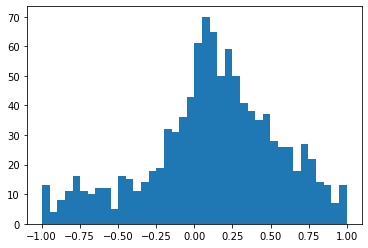

In [117]:
last_growth_rate = data[(data["price_change_perf"] > 30) 
                        & (data["last_growth_rate"] > -1)
                        & (data["last_growth_rate"] < 1)]
last_growth_rate = last_growth_rate.loc[:, 'last_growth_rate'].values

plt.hist(last_growth_rate, bins=40)

In [118]:
data[data["price_change_perf"] > 30]["last_market_dcf"].describe()

count      1667.000000
mean        371.713257
std       14756.082986
min      -61811.900000
25%           3.950000
50%          28.300000
75%          75.300000
max      595315.600000
Name: last_market_dcf, dtype: float64

(array([  3.,   2.,   5.,   3.,   5.,   6.,   4.,   6.,   8.,   6.,   6.,
          5.,   2.,  11.,   7.,   9.,  12.,  14.,   9.,  17., 129., 106.,
         94.,  75.,  69.,  71.,  62.,  61.,  51.,  41.,  38.,  29.,  35.,
         34.,  35.,  22.,  19.,  18.,  19.,  15.]),
 array([-98.7  , -93.735, -88.77 , -83.805, -78.84 , -73.875, -68.91 ,
        -63.945, -58.98 , -54.015, -49.05 , -44.085, -39.12 , -34.155,
        -29.19 , -24.225, -19.26 , -14.295,  -9.33 ,  -4.365,   0.6  ,
          5.565,  10.53 ,  15.495,  20.46 ,  25.425,  30.39 ,  35.355,
         40.32 ,  45.285,  50.25 ,  55.215,  60.18 ,  65.145,  70.11 ,
         75.075,  80.04 ,  85.005,  89.97 ,  94.935,  99.9  ]),
 <a list of 40 Patch objects>)

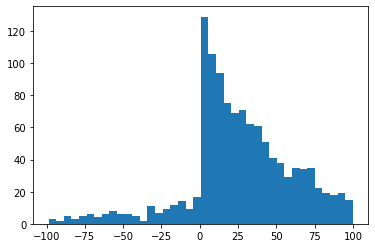

In [120]:
last_market_dcf = data[(data["price_change_perf"] > 30) 
                        & (data["last_market_dcf"] > -100)
                        & (data["last_market_dcf"] < 100)]
last_market_dcf = last_market_dcf.loc[:, 'last_market_dcf'].values

plt.hist(last_market_dcf, bins=40)

In [126]:
data[data["price_change_perf"] > 30]["market_dcf_to_price"].describe()

count    1.667000e+03
mean              inf
std               NaN
min     -8.192561e+05
25%     -6.947451e+00
50%      2.258172e+01
75%      1.082128e+02
max               inf
Name: market_dcf_to_price, dtype: float64

(array([ 2.,  1.,  3.,  0.,  1.,  1.,  1.,  2.,  3.,  1.,  5.,  2.,  5.,
        10., 10., 12., 14., 48., 54., 85., 76., 66., 63., 67., 45., 48.,
        42., 36., 36., 21., 24., 21., 19., 22., 20., 11., 17., 11., 12.,
        12.]),
 array([-91.76954733, -86.98017453, -82.19080173, -77.40142893,
        -72.61205613, -67.82268333, -63.03331053, -58.24393773,
        -53.45456493, -48.66519213, -43.87581933, -39.08644654,
        -34.29707374, -29.50770094, -24.71832814, -19.92895534,
        -15.13958254, -10.35020974,  -5.56083694,  -0.77146414,
          4.01790866,   8.80728146,  13.59665425,  18.38602705,
         23.17539985,  27.96477265,  32.75414545,  37.54351825,
         42.33289105,  47.12226385,  51.91163665,  56.70100945,
         61.49038224,  66.27975504,  71.06912784,  75.85850064,
         80.64787344,  85.43724624,  90.22661904,  95.01599184,
         99.80536464]),
 <a list of 40 Patch objects>)

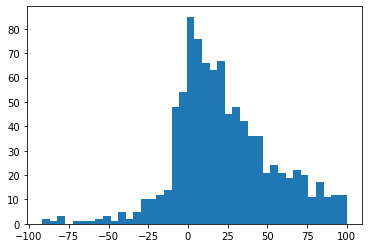

In [127]:
market_dcf_to_price = data[(data["price_change_perf"] > 30) 
                        & (data["market_dcf_to_price"] > -100)
                        & (data["market_dcf_to_price"] < 100)]
market_dcf_to_price = market_dcf_to_price.loc[:, 'market_dcf_to_price'].values

plt.hist(market_dcf_to_price, bins=40)

['last_growth_rate', 'last_market_dcf', 'last_dcf', 'dcf_to_price', 'market_dcf_to_price']


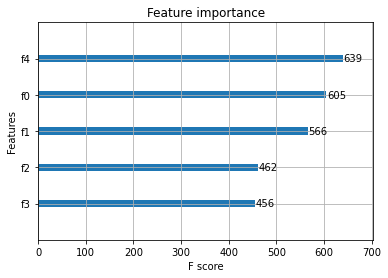

In [125]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
X = data[features].values
Y = data['direction'].values
# fit model no training data
model = XGBClassifier()
model.fit(X, Y)
# plot feature importance
plot_importance(model)
print (features)
pyplot.show()

In [166]:
filtered_outliner = data[(data["price_change_perf"] < 100) & (data["price_change_perf"] > -100) ]
features = ['last_growth_rate', 'last_market_dcf','market_dcf_to_price']
print(filtered_outliner.shape)

(6145, 18)


In [167]:


X = filtered_outliner[features].values
Y = (filtered_outliner.loc[:, 'price_change_perf'].values) 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

(array([ 14.,  15.,  23.,  16.,  29.,  39.,  21.,  39.,  37.,  47.,  51.,
         58.,  65.,  60.,  74.,  75.,  89.,  81., 114., 101.,  74.,  96.,
         98.,  88.,  86.,  72.,  62.,  60.,  39.,  50.,  34.,  33.,  27.,
         36.,  23.,  27.,  17.,  22.,  19.,  17.]),
 array([-98.73412699, -93.78222118, -88.83031538, -83.87840957,
        -78.92650376, -73.97459796, -69.02269215, -64.07078634,
        -59.11888054, -54.16697473, -49.21506893, -44.26316312,
        -39.31125731, -34.35935151, -29.4074457 , -24.45553989,
        -19.50363409, -14.55172828,  -9.59982248,  -4.64791667,
          0.30398914,   5.25589494,  10.20780075,  15.15970656,
         20.11161236,  25.06351817,  30.01542397,  34.96732978,
         39.91923559,  44.87114139,  49.8230472 ,  54.77495301,
         59.72685881,  64.67876462,  69.63067043,  74.58257623,
         79.53448204,  84.48638784,  89.43829365,  94.39019946,
         99.34210526]),
 <a list of 40 Patch objects>)

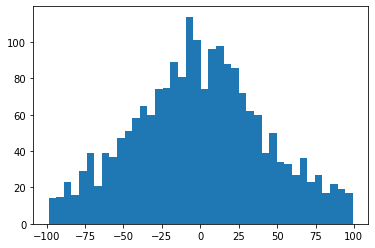

In [168]:
plt.hist(y_test, bins=40)

In [169]:
plt.hist(y_train, bins=40)

(array([ 15.,  22.,  32.,  51.,  40.,  62.,  68.,  72.,  84.,  82.,  90.,
         98., 149., 133., 161., 164., 178., 188., 209., 193., 211., 186.,
        175., 182., 186., 160., 140., 131., 106.,  84.,  76.,  68.,  76.,
         49.,  58.,  33.,  37.,  18.,  21.,  29.]),
 array([-100.        ,  -95.00668896,  -90.01337793,  -85.02006689,
         -80.02675585,  -75.03344482,  -70.04013378,  -65.04682274,
         -60.05351171,  -55.06020067,  -50.06688963,  -45.0735786 ,
         -40.08026756,  -35.08695652,  -30.09364548,  -25.10033445,
         -20.10702341,  -15.11371237,  -10.12040134,   -5.1270903 ,
          -0.13377926,    4.85953177,    9.85284281,   14.84615385,
          19.83946488,   24.83277592,   29.82608696,   34.81939799,
          39.81270903,   44.80602007,   49.7993311 ,   54.79264214,
          59.78595318,   64.77926421,   69.77257525,   74.76588629,
          79.75919732,   84.75250836,   89.7458194 ,   94.73913043,
          99.73244147]),
 <a list of 40 Patch 

In [170]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [171]:
y_pred = model.predict(X_test)

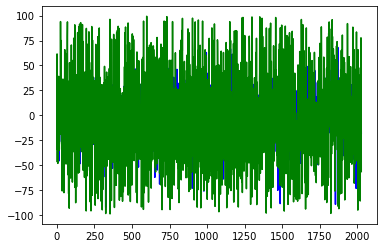

In [172]:
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.show()

In [173]:
accuracy = accuracy_score(y_test >= 30, y_pred >= 30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.05%


In [175]:
accuracy = accuracy_score(y_test >= 20, y_pred >= 20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.38%


In [174]:
accuracy = accuracy_score(y_test >= -30, y_pred >= -30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.41%


In [176]:
accuracy = accuracy_score(y_test >= -20, y_pred >= -20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.67%


In [71]:
new_data.to_csv("make_dcf_model_0609_88_accuracy.csv")

In [ ]:
!python -m nbconvert --to html DSF_Model_stats_model_5_years.ipynb

[NbConvertApp] Converting notebook DSF_Model_stats_model_5_years.ipynb to html
[NbConvertApp] Writing 575449 bytes to DSF_Model_stats_model_5_years.html
